In [1]:
# import data science libraries
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [2]:
# import data
labels = pd.read_csv('../data/earthquake/train_labels.csv')
labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 2 columns):
building_id     260601 non-null int64
damage_grade    260601 non-null int64
dtypes: int64(2)
memory usage: 4.0 MB


In [3]:
data = pd.read_csv('../data/earthquake/train_values.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 39 columns):
building_id                               260601 non-null int64
geo_level_1_id                            260601 non-null int64
geo_level_2_id                            260601 non-null int64
geo_level_3_id                            260601 non-null int64
count_floors_pre_eq                       260601 non-null int64
age                                       260601 non-null int64
area_percentage                           260601 non-null int64
height_percentage                         260601 non-null int64
land_surface_condition                    260601 non-null object
foundation_type                           260601 non-null object
roof_type                                 260601 non-null object
ground_floor_type                         260601 non-null object
other_floor_type                          260601 non-null object
position                                  260601 non

In [4]:
combined_data = pd.merge(data, labels, on='building_id')
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260601 entries, 0 to 260600
Data columns (total 40 columns):
building_id                               260601 non-null int64
geo_level_1_id                            260601 non-null int64
geo_level_2_id                            260601 non-null int64
geo_level_3_id                            260601 non-null int64
count_floors_pre_eq                       260601 non-null int64
age                                       260601 non-null int64
area_percentage                           260601 non-null int64
height_percentage                         260601 non-null int64
land_surface_condition                    260601 non-null object
foundation_type                           260601 non-null object
roof_type                                 260601 non-null object
ground_floor_type                         260601 non-null object
other_floor_type                          260601 non-null object
position                                  260601 non

In [5]:
combined_data.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,3
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,0,2
2,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,0,0,3
3,590882,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,0,0,0,0,2
4,201944,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,0,0,0,0,3


In [6]:
ageData=combined_data['age']

### Visualizing the age spread

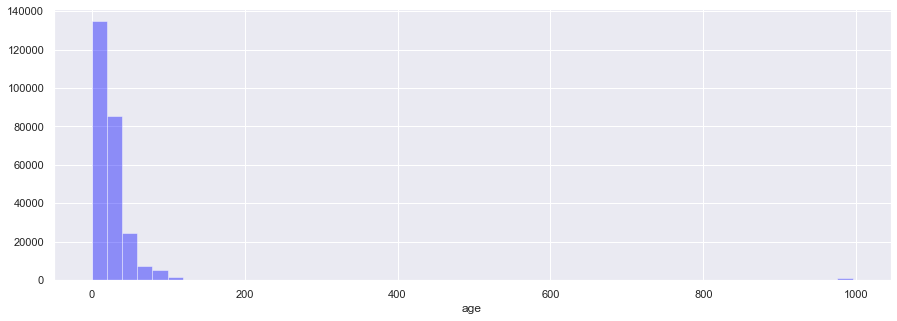

In [7]:
f, axes = plt.subplots(1, 1, figsize=(15, 5))
sb.distplot(ageData, kde = False, color = "blue")

In [8]:
print("Number of Damage Levels :", len(combined_data["damage_grade"].unique()))
print(combined_data["damage_grade"].value_counts())

Number of Damage Levels : 3
2    148259
3     87218
1     25124
Name: damage_grade, dtype: int64


### Visualizing the damage spread

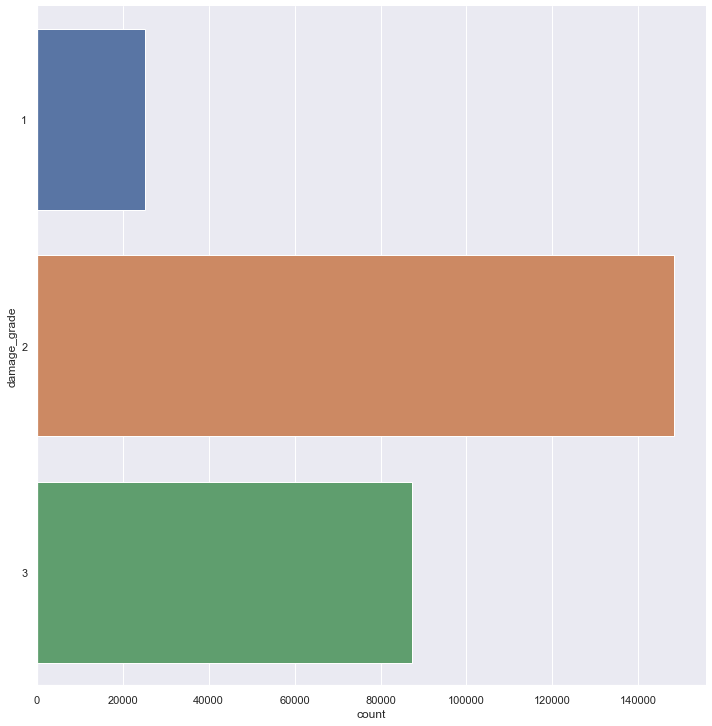

In [9]:
sb.catplot(y = "damage_grade", data = combined_data, kind = "count",height=10)

### Plotting damage vs age

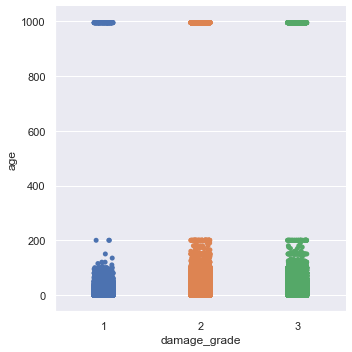

In [10]:
sb.catplot(x="damage_grade", y= "age",data =combined_data)

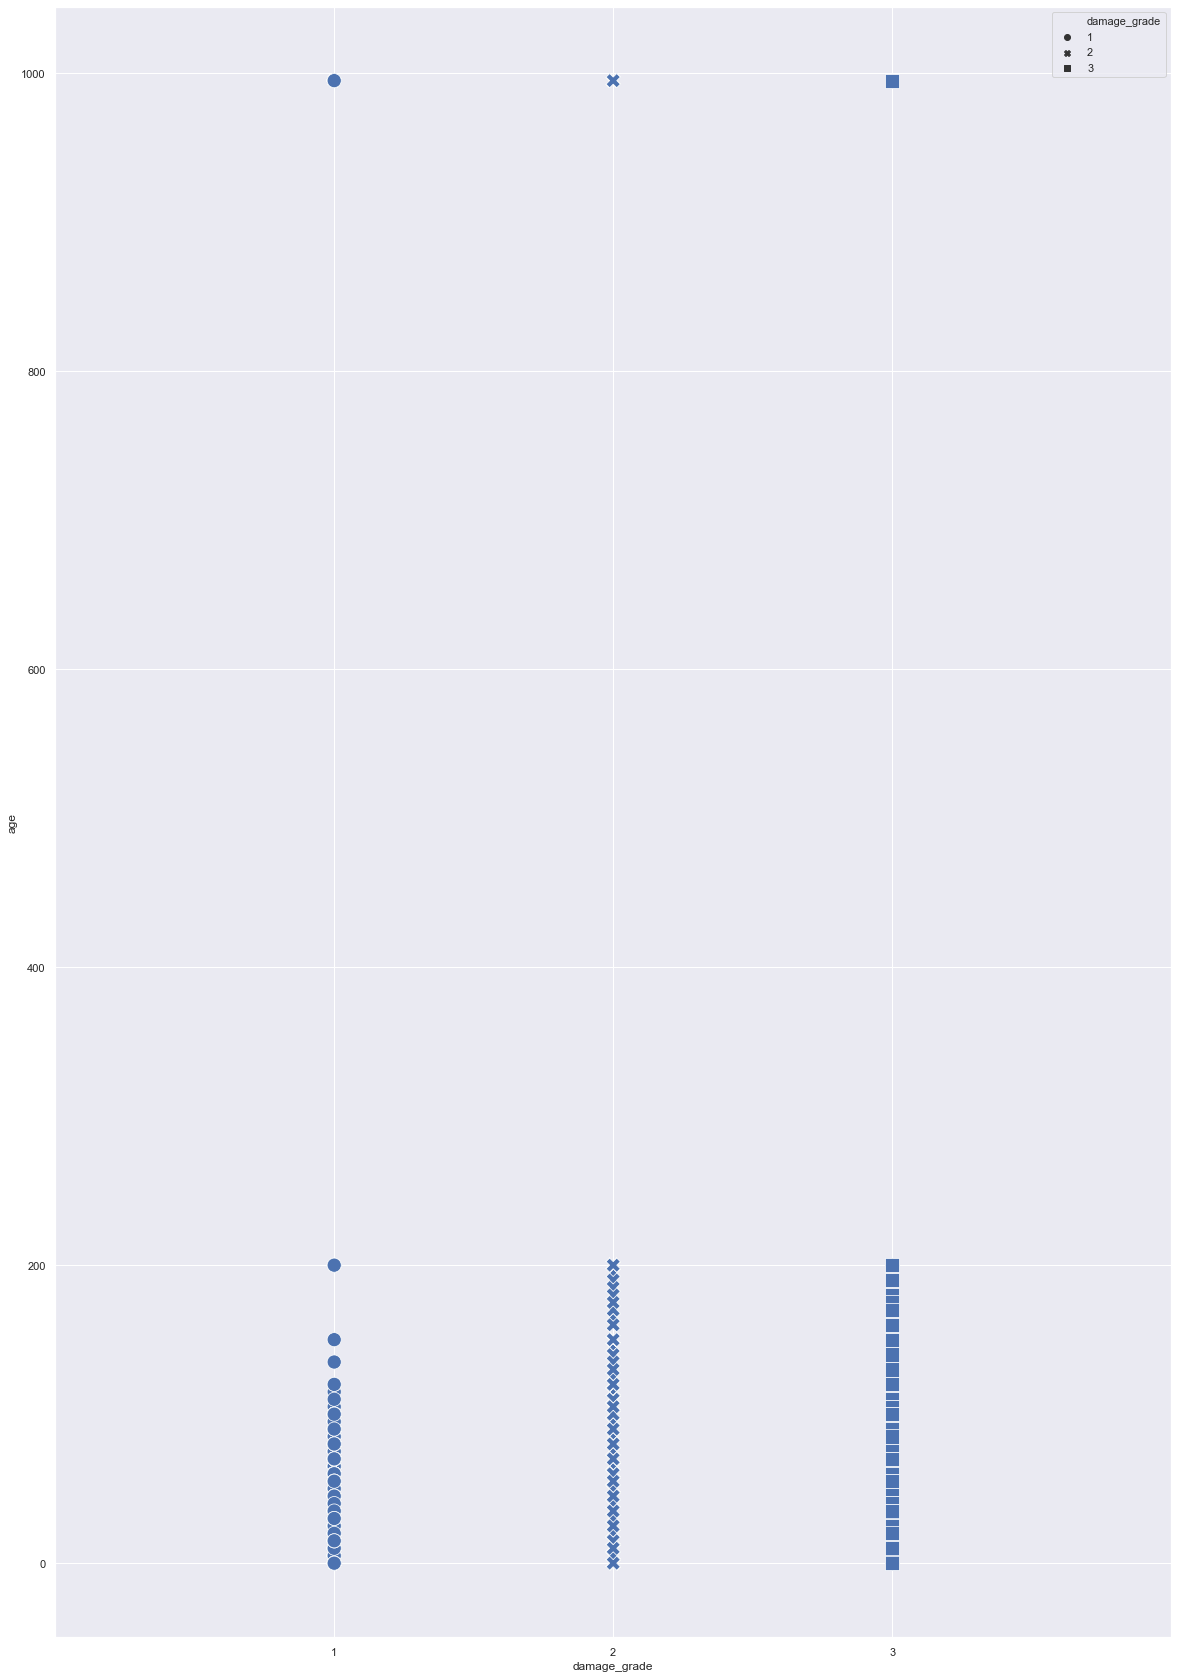

In [11]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 30)
sb.scatterplot(x="damage_grade", y= "age",data =combined_data, style = "damage_grade", s=200)
ax.set_xlim(0,4)
ax.set_xticks(range(1,4))
plt.show()


#https://stackoverflow.com/questions/54822884/how-to-change-the-x-axis-range-in-seaborn-in-python
#https://stackoverflow.com/questions/31594549/how-do-i-change-the-figure-size-for-a-seaborn-plot

## Our usual thought will be older builings takes higher damage, but it is not true. Building of age 0 to 200 takes damage equaivalently. This could be due to buildings of diiferent materials

## Age of building does not have an effect on the damage

### Visualizing the damage against different plan configuration

#### Plan D is the contributor to most of the damage

Text(0.5, 1.0, 'Which plan configuration contributed to most damage?')

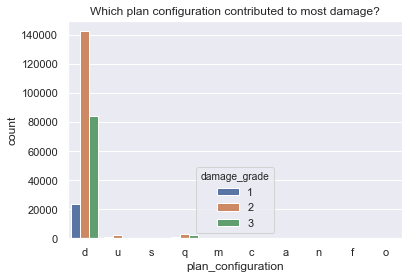

In [12]:
ax = sb.countplot(x="plan_configuration", hue="damage_grade", data=combined_data)
ax.set_title("Which plan configuration contributed to most damage?")

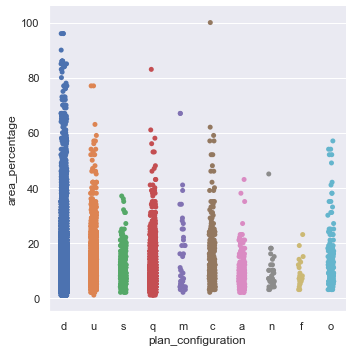

In [13]:
sb.catplot(x="plan_configuration", y = "area_percentage", data=combined_data)

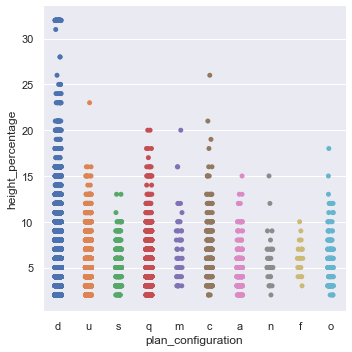

In [14]:
sb.catplot(x="plan_configuration", y = "height_percentage", data=combined_data)

In [15]:
planConfigDf = combined_data['plan_configuration']
planConfigDf.head()

0    d
1    d
2    d
3    d
4    d
Name: plan_configuration, dtype: object

## Sorting each config plan to 1 dataframe each

In [16]:
aPlan= []
cPlan= []
dPlan= []
fPlan= []
mPlan= []
nPlan= []
oPlan= []
qPlan= []
sPlan= []
uPlan= []

for x in range(0,len(combined_data)):
    if(planConfigDf.iloc[x] == 'a'):
        aPlan.append(combined_data.iloc[x])
    if(planConfigDf.iloc[x] == 'c'):
        cPlan.append(combined_data.iloc[x])
    if(planConfigDf.iloc[x] == 'd'):
        dPlan.append(combined_data.iloc[x])
    if(planConfigDf.iloc[x] == 'f'):
        fPlan.append(combined_data.iloc[x])
    if(planConfigDf.iloc[x] == 'm'):
        mPlan.append(combined_data.iloc[x])
    if(planConfigDf.iloc[x] == 'n'):
        nPlan.append(combined_data.iloc[x])
    if(planConfigDf.iloc[x] == 'o'):
        oPlan.append(combined_data.iloc[x])
    if(planConfigDf.iloc[x] == 'q'):
        qPlan.append(combined_data.iloc[x])
    if(planConfigDf.iloc[x] == 's'):
        sPlan.append(combined_data.iloc[x])
    if(planConfigDf.iloc[x] == 'u'):
        uPlan.append(combined_data.iloc[x])

In [17]:
print(len(aPlan))
print(len(cPlan))
print(len(dPlan))
print(len(fPlan))
print(len(mPlan))

print(len(nPlan))
print(len(oPlan))
print(len(qPlan))
print(len(sPlan))
print(len(uPlan))

252
325
250072
22
46
38
159
5692
346
3649


In [18]:
aPlanDf= pd.DataFrame(aPlan)
cPlanDf= pd.DataFrame(cPlan)
dPlanDf= pd.DataFrame(dPlan)
fPlanDf= pd.DataFrame(fPlan)
mPlanDf= pd.DataFrame(mPlan)
nPlanDf= pd.DataFrame(nPlan)
oPlanDf= pd.DataFrame(oPlan)
qPlanDf= pd.DataFrame(qPlan)
sPlanDf= pd.DataFrame(sPlan)
uPlanDf= pd.DataFrame(uPlan)

#https://thispointer.com/python-pandas-how-to-convert-lists-to-a-dataframe/

## Plotting area vs height against damage for each config plan

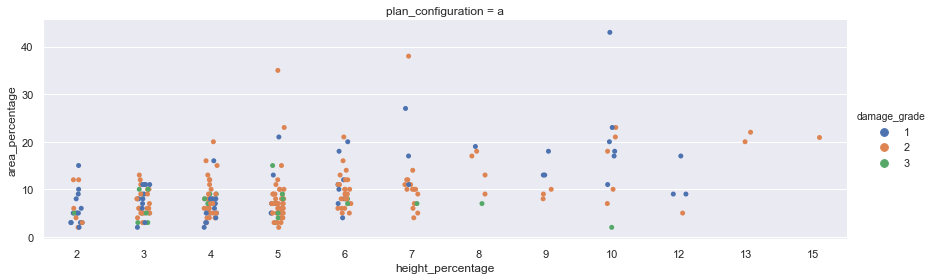

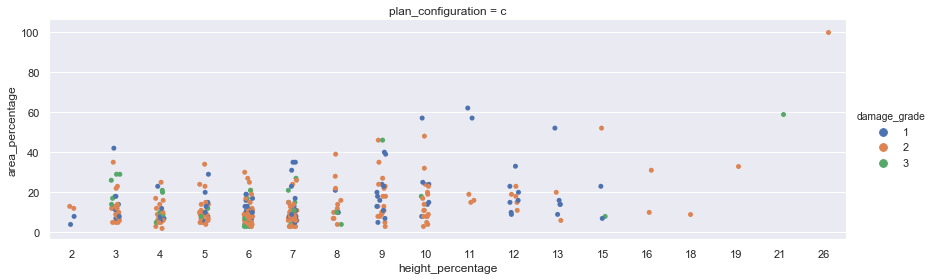

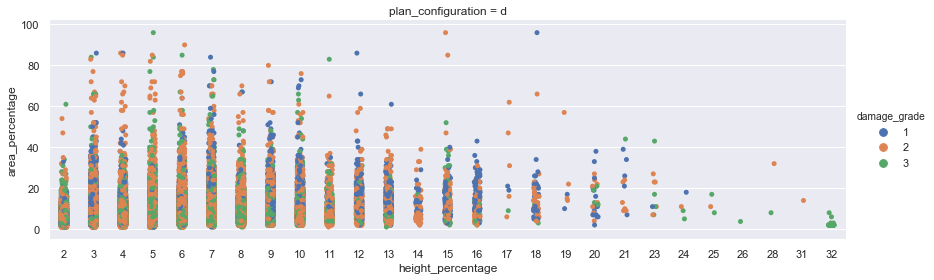

In [19]:
sb.catplot(x="height_percentage", y = "area_percentage",hue="damage_grade", data=aPlanDf, height=4, aspect=3, col="plan_configuration")
sb.catplot(x="height_percentage", y = "area_percentage",hue="damage_grade", data=cPlanDf, height=4, aspect=3, col="plan_configuration")
sb.catplot(x="height_percentage", y = "area_percentage",hue="damage_grade", data=dPlanDf, height=4, aspect=3, col="plan_configuration")

#https://stackoverflow.com/questions/51826447/how-to-resize-a-catplot-of-kind-swarm-in-seaborn-without-generating-a-second-p

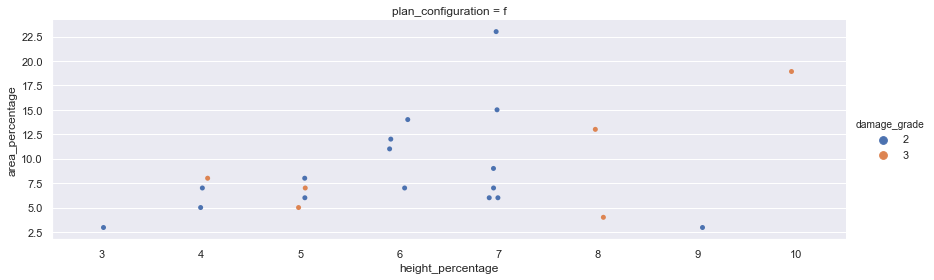

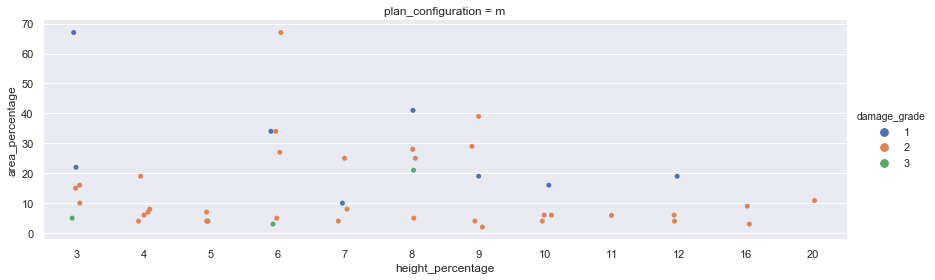

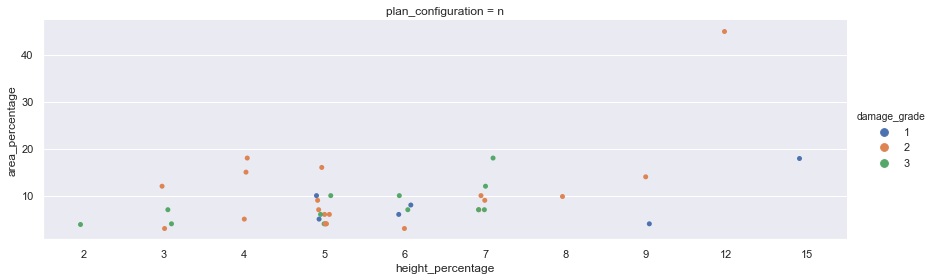

In [20]:
sb.catplot(x="height_percentage", y = "area_percentage",hue="damage_grade", data=fPlanDf, height=4, aspect=3, col="plan_configuration")
sb.catplot(x="height_percentage", y = "area_percentage",hue="damage_grade", data=mPlanDf, height=4, aspect=3, col="plan_configuration")
sb.catplot(x="height_percentage", y = "area_percentage",hue="damage_grade", data=nPlanDf, height=4, aspect=3, col="plan_configuration")

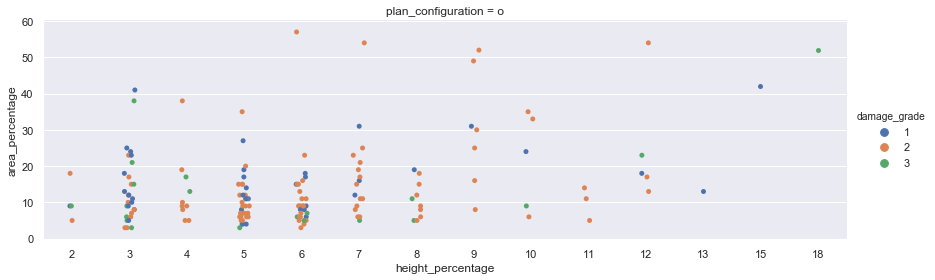

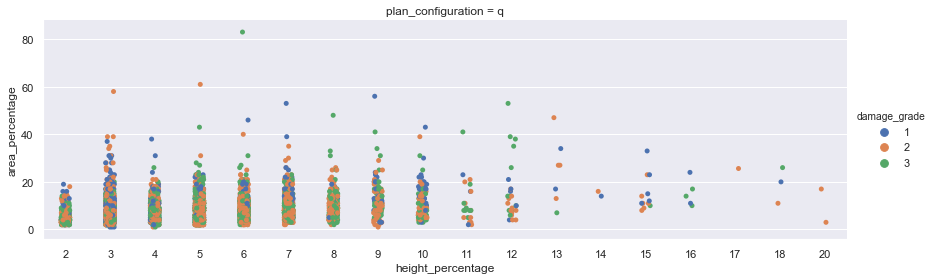

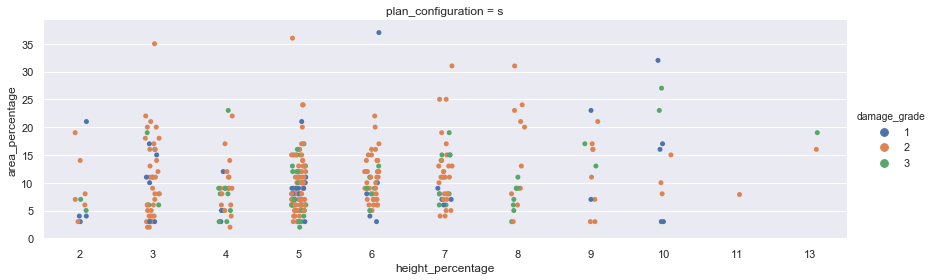

In [21]:
sb.catplot(x="height_percentage", y = "area_percentage",hue="damage_grade", data=oPlanDf, height=4, aspect=3, col="plan_configuration")
sb.catplot(x="height_percentage", y = "area_percentage",hue="damage_grade", data=qPlanDf, height=4, aspect=3, col="plan_configuration")
sb.catplot(x="height_percentage", y = "area_percentage",hue="damage_grade", data=sPlanDf, height=4, aspect=3, col="plan_configuration")

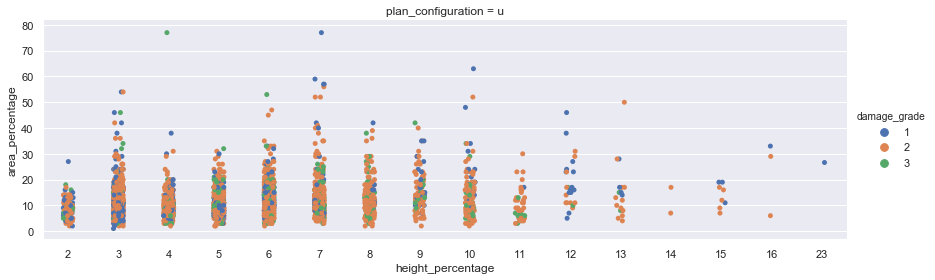

In [22]:
sb.catplot(x="height_percentage", y = "area_percentage",hue="damage_grade", data=uPlanDf, height=4, aspect=3, col="plan_configuration")

## Number of building taken damage to each floors in each configuration plan

Text(0.5, 1.0, 'Config Plan d')

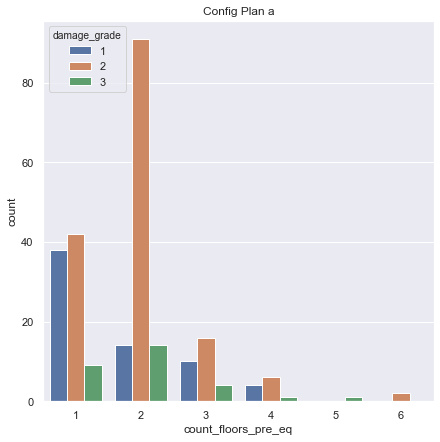

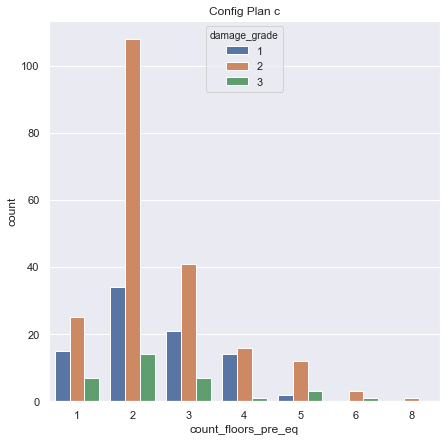

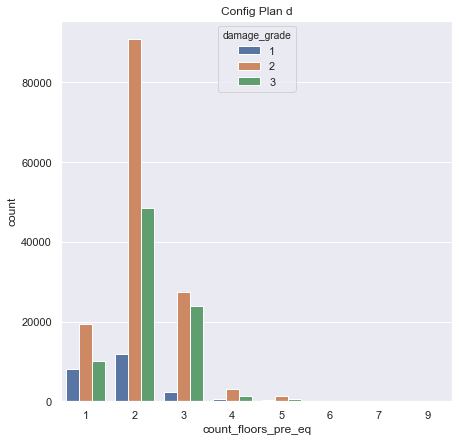

In [23]:
f, axes = plt.subplots(figsize=(7, 7))
ax = sb.countplot(x="count_floors_pre_eq", hue="damage_grade", data=aPlanDf)
ax.set_title("Config Plan a")

f, axes = plt.subplots(figsize=(7, 7))
ax = sb.countplot(x="count_floors_pre_eq", hue="damage_grade", data=cPlanDf)
ax.set_title("Config Plan c")

f, axes = plt.subplots(figsize=(7, 7))
ax = sb.countplot(x="count_floors_pre_eq", hue="damage_grade", data=dPlanDf)
ax.set_title("Config Plan d")

Text(0.5, 1.0, 'Config Plan n')

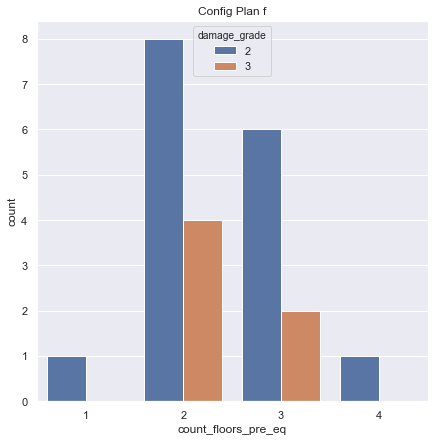

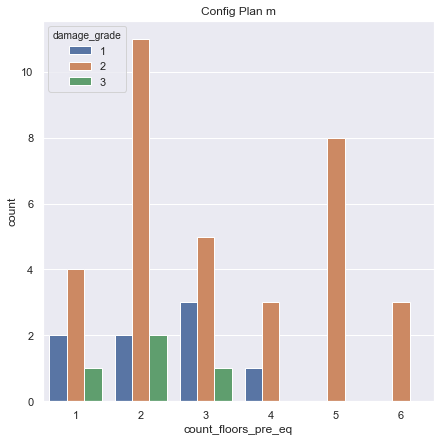

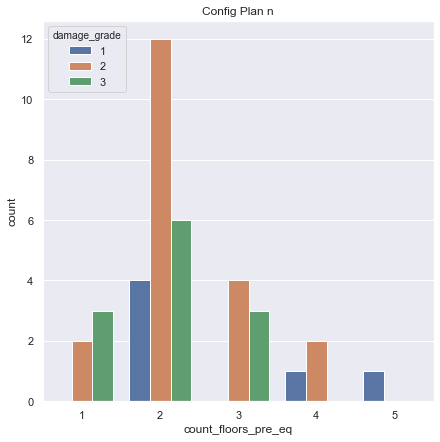

In [24]:
f, axes = plt.subplots(figsize=(7, 7))
ax = sb.countplot(x="count_floors_pre_eq", hue="damage_grade", data=fPlanDf)
ax.set_title("Config Plan f")

f, axes = plt.subplots(figsize=(7, 7))
ax = sb.countplot(x="count_floors_pre_eq", hue="damage_grade", data=mPlanDf)
ax.set_title("Config Plan m")

f, axes = plt.subplots(figsize=(7, 7))
ax = sb.countplot(x="count_floors_pre_eq", hue="damage_grade", data=nPlanDf)
ax.set_title("Config Plan n")

Text(0.5, 1.0, 'Config Plan s')

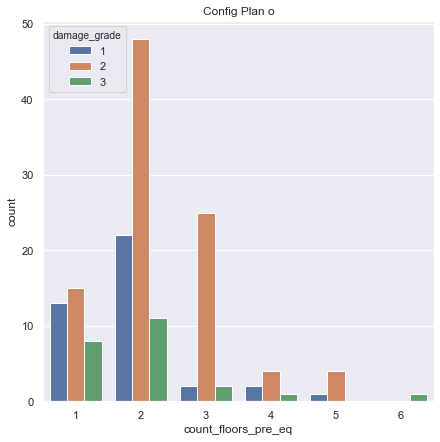

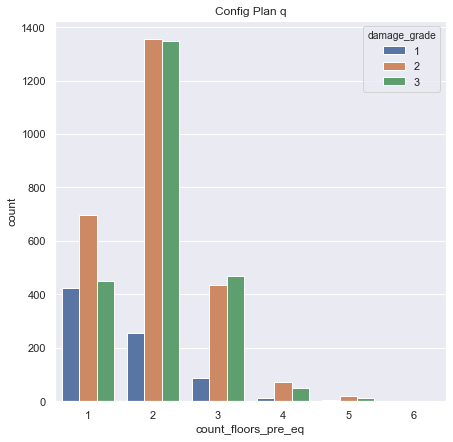

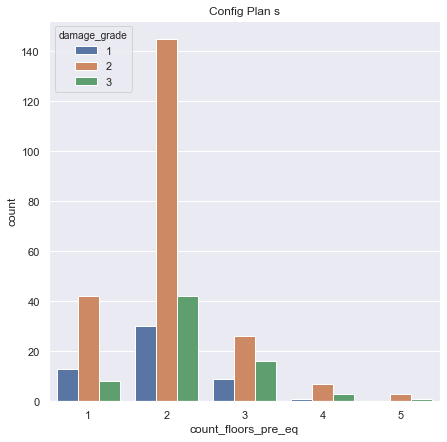

In [25]:
f, axes = plt.subplots(figsize=(7, 7))
ax = sb.countplot(x="count_floors_pre_eq", hue="damage_grade", data=oPlanDf)
ax.set_title("Config Plan o")

f, axes = plt.subplots(figsize=(7, 7))
ax = sb.countplot(x="count_floors_pre_eq", hue="damage_grade", data=qPlanDf)
ax.set_title("Config Plan q")

f, axes = plt.subplots(figsize=(7, 7))
ax = sb.countplot(x="count_floors_pre_eq", hue="damage_grade", data=sPlanDf)
ax.set_title("Config Plan s")

Text(0.5, 1.0, 'Config Plan u')

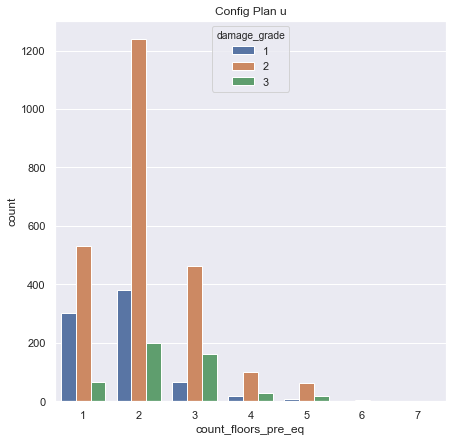

In [26]:
f, axes = plt.subplots(figsize=(7, 7))
ax = sb.countplot(x="count_floors_pre_eq", hue="damage_grade", data=uPlanDf)
ax.set_title("Config Plan u")

## Sorting the 3 different damage types to each dataframe

In [28]:
damageGradeDf = combined_data['damage_grade']
damageGradeDf.head()

0    3
1    2
2    3
3    2
4    3
Name: damage_grade, dtype: int64

In [29]:
damage_grade_1= []
damage_grade_2= []
damage_grade_3= []


for x in range(0,len(combined_data)):
    if(damageGradeDf.iloc[x] == 1):
        damage_grade_1.append(combined_data.iloc[x])
    if(damageGradeDf.iloc[x] == 2):
        damage_grade_2.append(combined_data.iloc[x])
    if(damageGradeDf.iloc[x] == 3):
        damage_grade_3.append(combined_data.iloc[x])

In [30]:
print(len(damage_grade_1))
print(len(damage_grade_2))
print(len(damage_grade_3))

25124
148259
87218


In [31]:
damage_grade_1_Df= pd.DataFrame(damage_grade_1)
damage_grade_2_Df= pd.DataFrame(damage_grade_2)
damage_grade_3_Df= pd.DataFrame(damage_grade_3)

In [37]:
print(len(combined_data)) 

260601


## Plotting number of buildings damaged for each config plans against each damage level

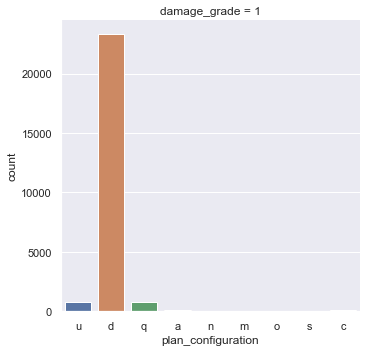

In [64]:
sb.catplot(x = "plan_configuration", data = damage_grade_1_Df, kind = "count",height=5, col ="damage_grade")

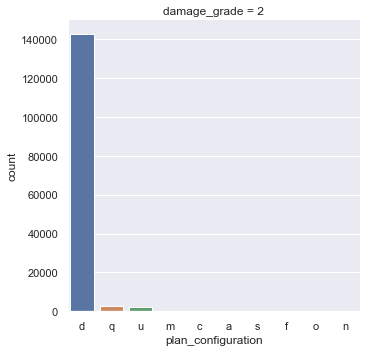

In [65]:
sb.catplot(x = "plan_configuration", data = damage_grade_2_Df, kind = "count",height=5,col ="damage_grade")

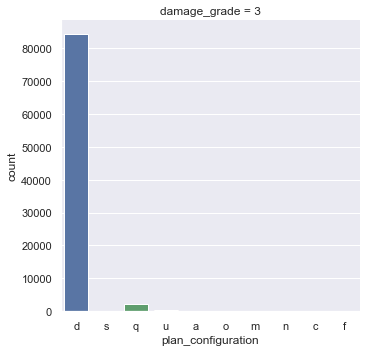

In [66]:
sb.catplot(x = "plan_configuration", data = damage_grade_3_Df, kind = "count",height=5,col ="damage_grade")